In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import signal
from numpy.fft import fft, rfft, ifft
from audlib.sig.fbanks import MelFreq
from audlib.plot import magresp
plt.rc('text', usetex=True)

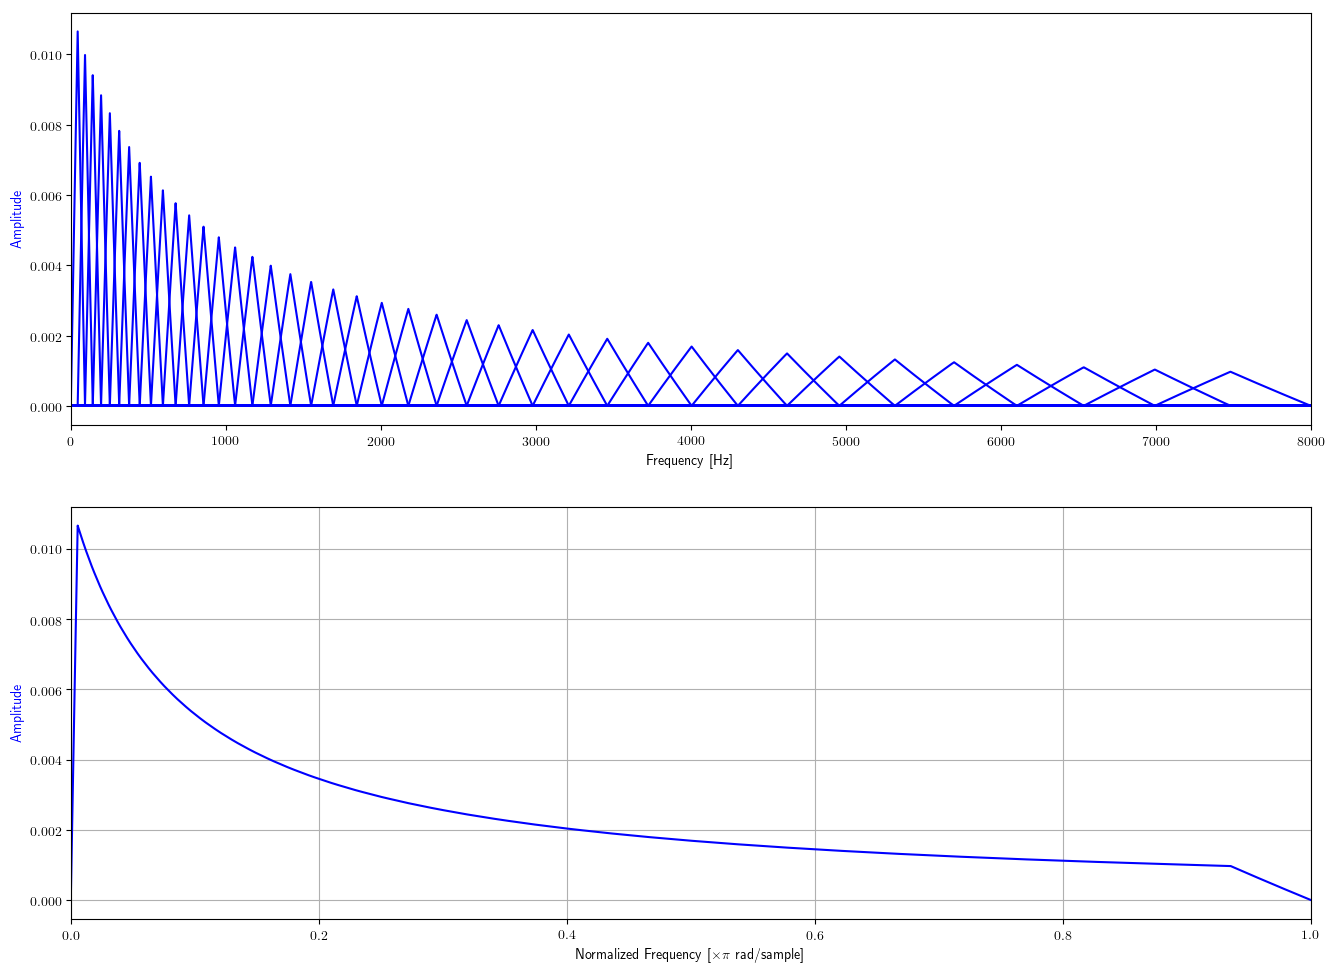

In [2]:
sr = 16000
nfft = 2**15
nyquist = nfft//2+1  # Boundary for Nyquist frequency
num_chans = 40
melbank = MelFreq(sr, nfft, num_chans, unity=True)

### Plot filter responses
fig = plt.figure(figsize=(16, 12), dpi= 100)
ax1 = fig.add_subplot(211)

total = np.zeros((nyquist), dtype=np.complex_)
for kk in range(len(melbank)):
    ww, hh = melbank.freqz(kk)
    total += hh[:nyquist]
    magresp(ww[:nyquist]*(sr/2), hh[:nyquist], ax1, units=('hz', 'mag'))

# Plot total filter response
ax2 = fig.add_subplot(212)
magresp(ww[:nyquist], total, ax2, units=('rad', 'mag'))

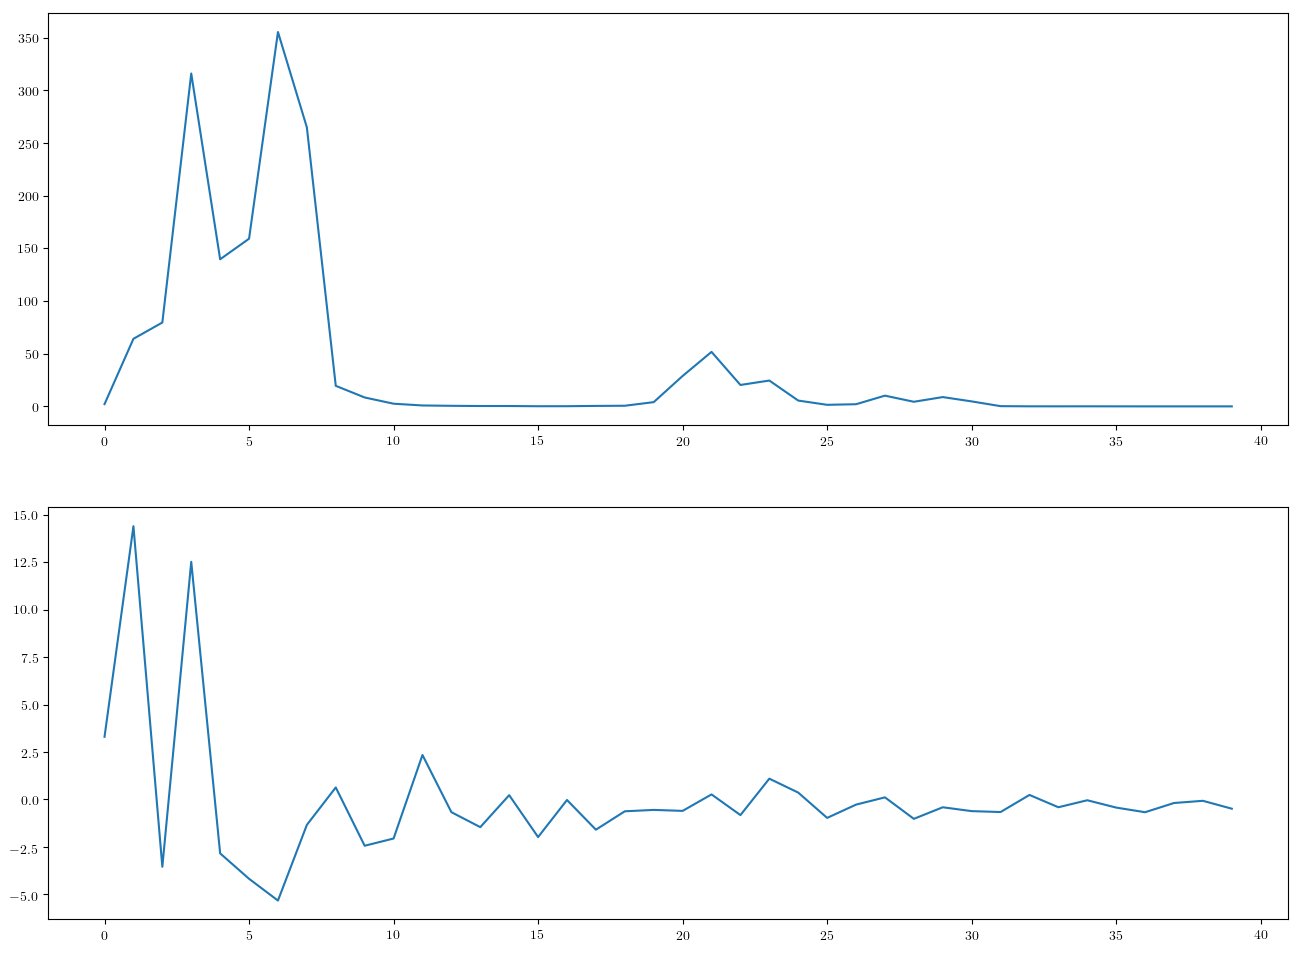

In [3]:
# Visualize MFCC

from audlib.io.audio import audioread
from audlib.plot import cepline

sig, sr = audioread('../../samples/welcome16k.wav')
nstart = int(sr*0.534)  # Rich Stern uttering 'ee' of 'D'.
nfft = 512
dee = sig[nstart:nstart+nfft]
powerspec_dee = np.abs(rfft(dee))**2
melbank = MelFreq(sr, nfft, 40, unity=True)
ndct = 20
melspec_dee = melbank.melspec(powerspec_dee)
mfcc_dee = melbank.mfcc(powerspec_dee)
#import ipdb; ipdb.set_trace()
#cepline(np.arange(ndct), mfcc_dee, ax1)
fig = plt.figure(figsize=(16, 12), dpi=100)
ax1 = fig.add_subplot(211)
ax1.plot(melspec_dee)
ax2 = fig.add_subplot(212)
ax2.plot(mfcc_dee)